# Diabetes Prediction using Machine Learning

This notebook contains various Python-based data science and machine learning libraries used in an attempt to build a machine learning model capable of predicting where a patient has diabetes or not based on the health attributes of the patient

This will be achieved using the following approach:

## 1. Problem Definition

> Given the medical attributes of the patients are we able to predicts whether the patient has diabetes or not?

## 2. Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

The data can be found in kaggle.com ~ https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 3. Evaluation

> We will try to reach an evaluation metric of 95% in predicting whether the a patient has diabetes or not

## 4. Features

**This are the features found in the data**

* Preg	Number of times pregnant	Numeric	[0, 17]
* Gluc	Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)	Numeric	[0, 199]
* BP	Diastolic Blood Pressure (mm Hg)	Numeric	[0, 122]
* Skin	Triceps skin fold thickness (mm)	Numeric	[0, 99]
* Insulin	2-Hour Serum insulin (µh/ml)	Numeric	[0, 846]
* BMI	Body mass index [weight in kg/(Height in m)]	Numeric	[0, 67.1]
* DPF	Diabetes pedigree function	Numeric	[0.078, 2.42]
* Age	Age (years)	Numeric	[21, 81]
* Outcome	Binary value indicating non-diabetic /diabetic

## Preparing tools

In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



## Load data

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

our dataset has zero missing values
there are no categorical columns

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


our data has some invalid 0 values, this can be replaced with the mean

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# checking the invalid zero values in some of the features in the dataset
(df['BloodPressure'] == 0).sum(), (df['Insulin'] == 0).sum(), (df['SkinThickness'] == 0).sum(), (df['Glucose'] == 0).sum(), (df['BMI'] == 0).sum()

(35, 374, 227, 5, 11)

In [8]:
# replacing the the invalid zero's with the median
features = ['BloodPressure', 'Insulin', 'SkinThickness', 'Glucose', 'BMI']

for feature in features:
    df[feature] = df[feature].replace(0, df[feature].median())

In [9]:
(df['BloodPressure'] == 0).sum(), (df['Insulin'] == 0).sum(), (df['SkinThickness'] == 0).sum(), (df['Glucose'] == 0).sum(), (df['BMI'] == 0).sum()

(0, 0, 0, 0, 0)

In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1
767,1,93,70,31,30.5,30.4,0.315,23,0


In [11]:
# find the number of each classes there are
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

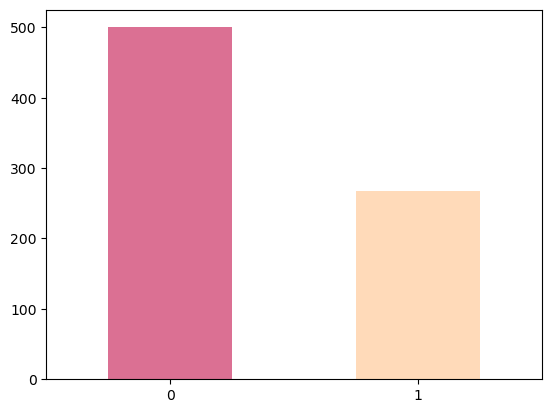

In [12]:
# Visualizing the classes
df['Outcome'].value_counts().plot(kind='bar', color=['palevioletred', 'peachpuff'])
plt.xticks(rotation=0);

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


#### Comparing age with the insulin


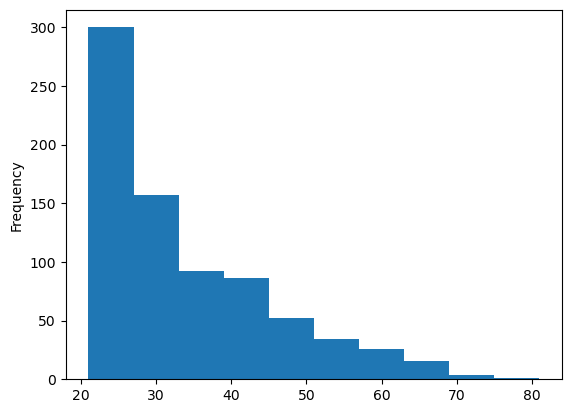

In [14]:
# checking age distribution
df.Age.plot.hist();

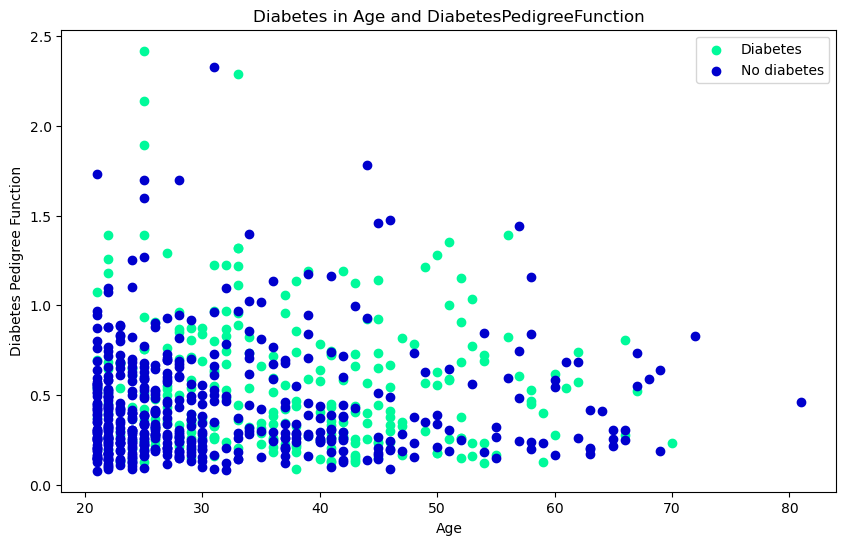

In [15]:
# create a figure
plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.scatter(df.Age[df.Outcome == 1],
            df.DiabetesPedigreeFunction[df.Outcome == 1],
            c="mediumspringgreen");

# scatter with negative examples
plt.scatter(df.Age[df.Outcome == 0],
            df.DiabetesPedigreeFunction[df.Outcome == 0],
            c="mediumblue");

# add some information to the plot
plt.title("Diabetes in Age and DiabetesPedigreeFunction")
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function")
plt.legend(["Diabetes", "No diabetes"]);

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


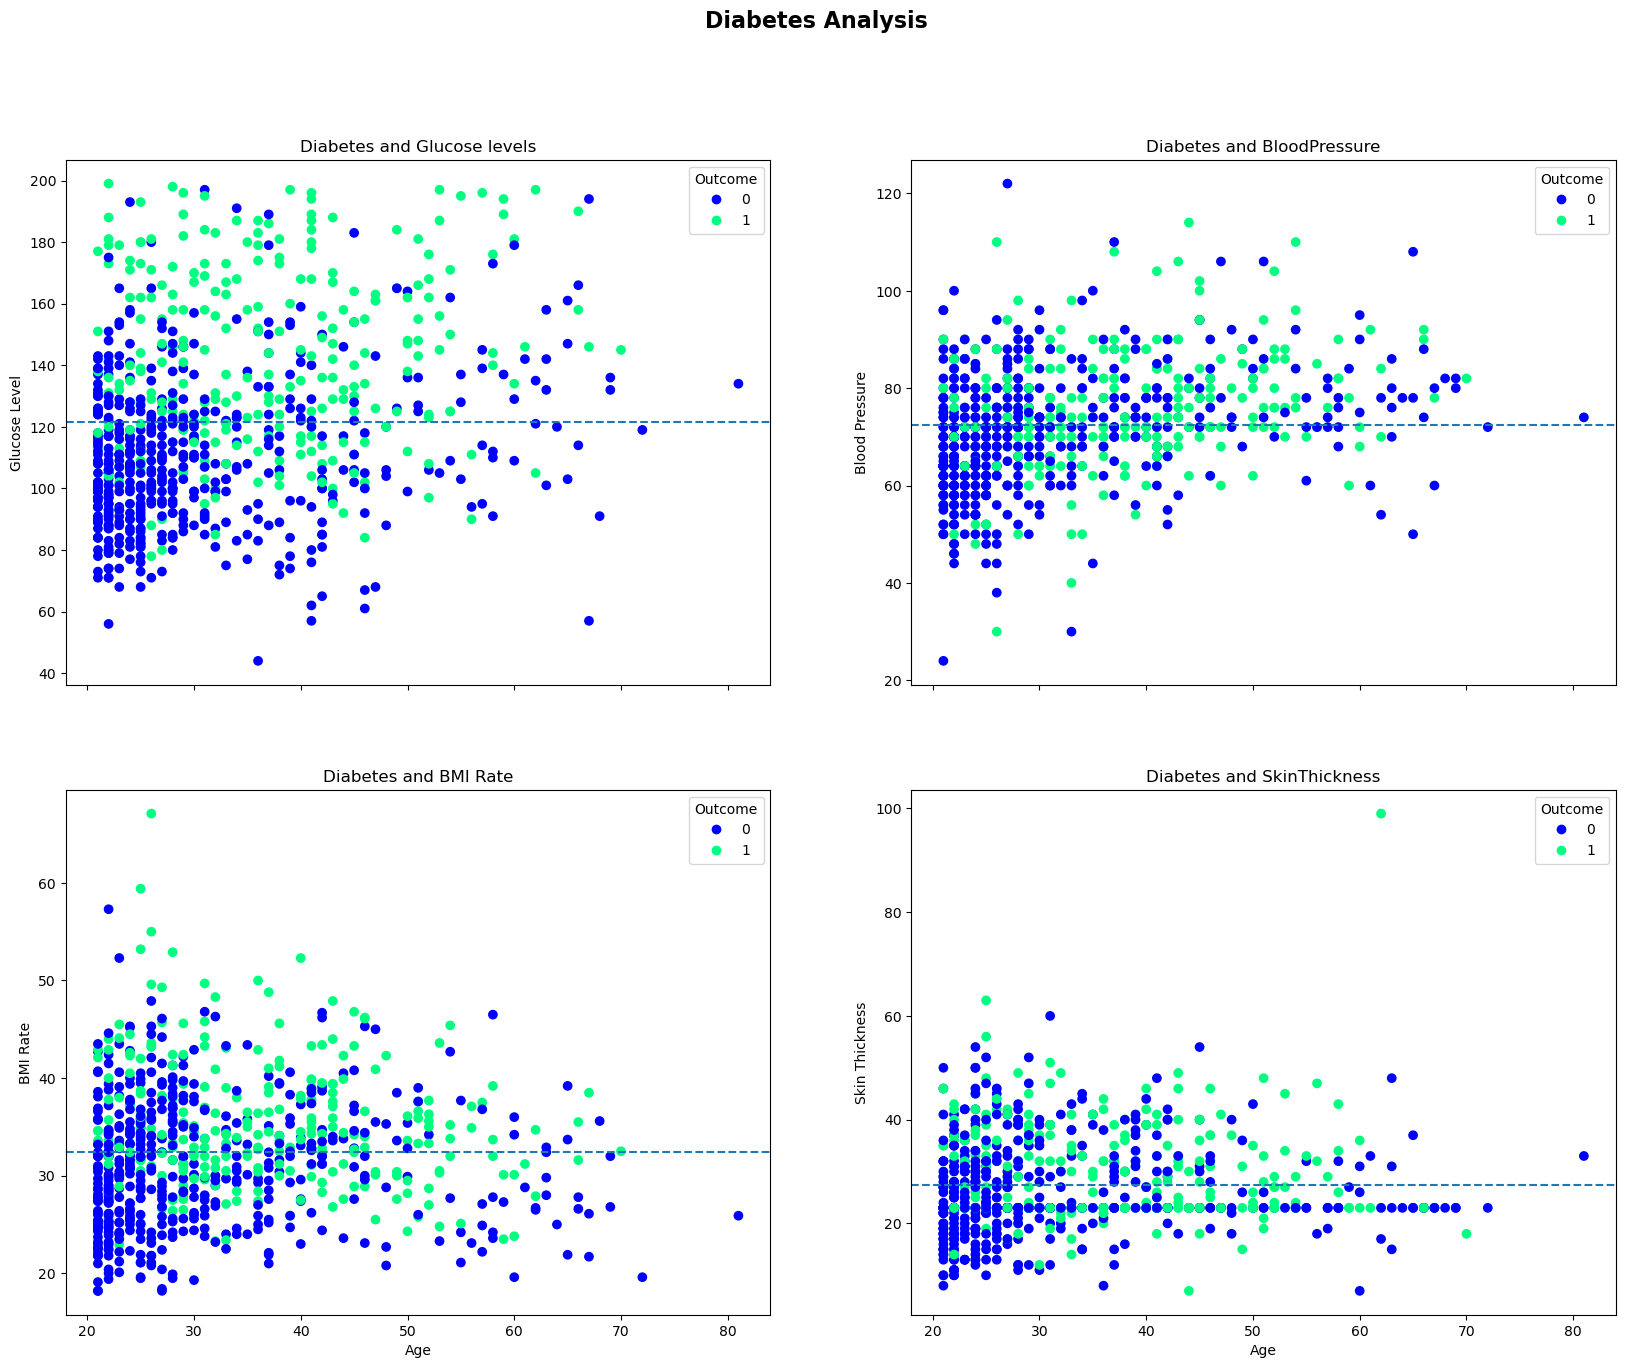

In [17]:
# Create a subplot of age, glucose, bloodpressure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,
                                         ncols=2,
                                         figsize=(20, 15),
                                         sharex=True);

# add data to ax0
scatter = ax0.scatter(x=df["Age"],
                      y=df["Glucose"],
                      c=df["Outcome"],
                      cmap="winter")

# customize ax0
ax0.set(title="Diabetes and Glucose levels",
        ylabel="Glucose Level")

# add legend
ax0.legend(*scatter.legend_elements(), title='Outcome')

# add meanline
ax0.axhline(y=df["Glucose"].mean(),
             linestyle="--")

# add data to ax1
scatter = ax1.scatter(x=df["Age"],
                      y=df["BloodPressure"],
                      c=df["Outcome"],
                      cmap='winter')

# customize ax1
ax1.set(title="Diabetes and BloodPressure",
        ylabel="Blood Pressure")

# add legend
ax1.legend(*scatter.legend_elements(), title='Outcome')

# add meanline
ax1.axhline(y=df["BloodPressure"].mean(),
             linestyle="--")

# add data to ax2
scatter = ax2.scatter(x=df["Age"],
                      y=df["BMI"],
                      c=df["Outcome"],
                      cmap='winter')

# customize ax2
ax2.set(title="Diabetes and BMI Rate",
        ylabel="BMI Rate",
        xlabel="Age")

# add legend
ax2.legend(*scatter.legend_elements(), title='Outcome')

# add meanline
ax2.axhline(y=df["BMI"].mean(),
             linestyle="--")

# add data to ax3
scatter = ax3.scatter(x=df["Age"],
                      y=df["SkinThickness"],
                      c=df["Outcome"],
                      cmap='winter')

# customize ax3
ax3.set(title="Diabetes and SkinThickness",
        ylabel="Skin Thickness",
        xlabel="Age")

# add legend
ax3.legend(*scatter.legend_elements(), title='Outcome')

# add meanline
ax3.axhline(y=df["SkinThickness"].mean(),
             linestyle="--")

# add title to the whole figure
fig.suptitle("Diabetes Analysis", fontsize=16, fontweight="bold");

In [18]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [19]:
# creating a correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


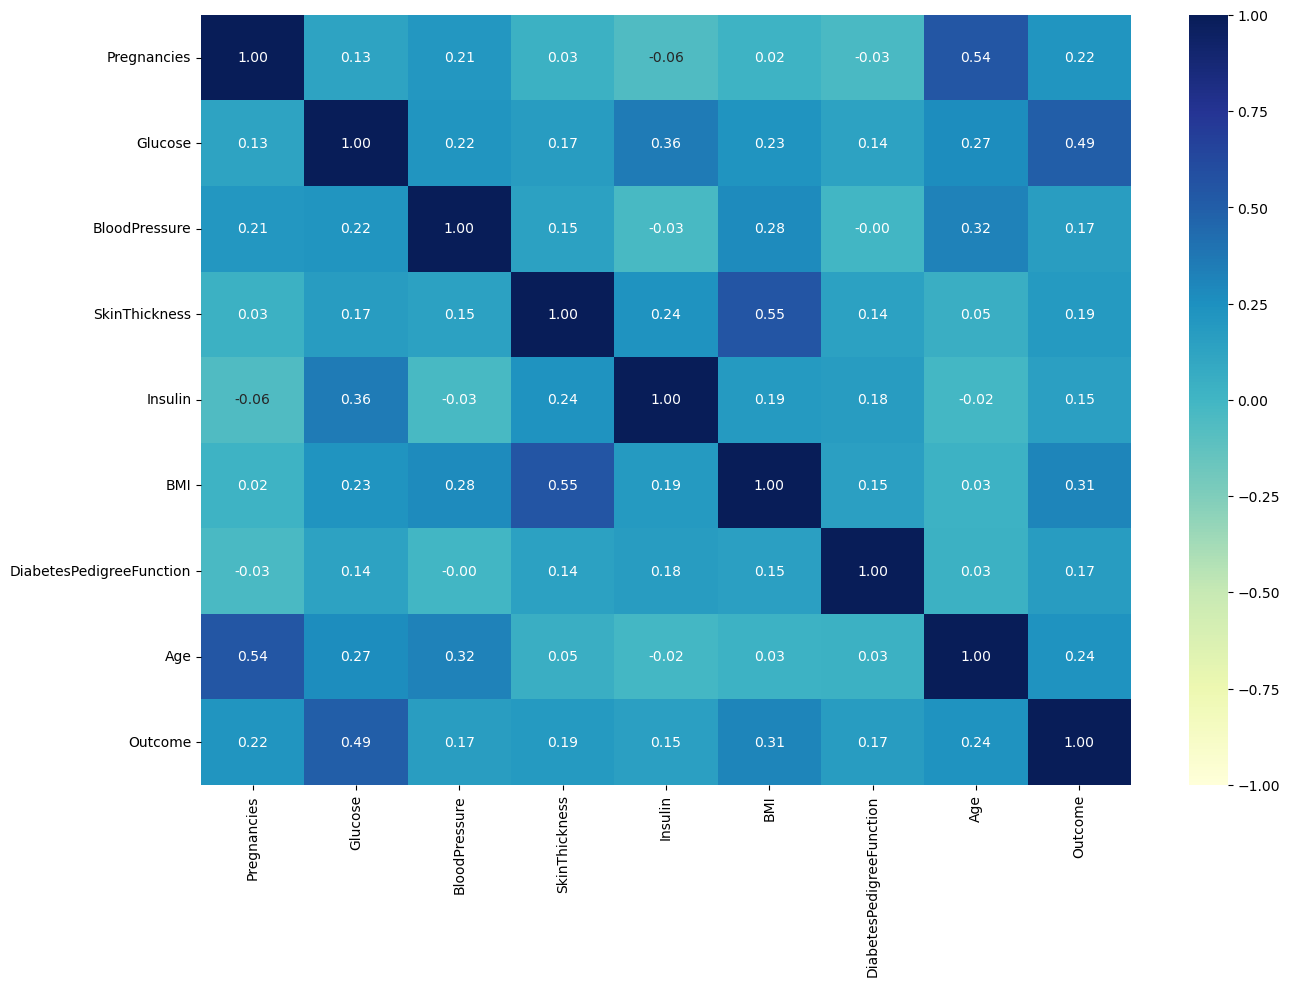

In [21]:
# visualizing the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            cmap="YlGnBu")